In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [96]:
dataknn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Dataset/KNNAlgorithmDataset.csv')

In [97]:
print(dataknn.shape)
dataknn.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [98]:
dataknn.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [99]:
X = dataknn.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [100]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [101]:
dataknn['label'] = dataknn['diagnosis'].map({'M': 0, 'B': 1})

In [102]:
y = dataknn[['label']]

In [103]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [104]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [105]:
knn = KNeighborsClassifier(n_neighbors=7)

In [106]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [107]:
# Predict on dataset which model has not seen before
y_pred = knn.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score

##**Score**

In [109]:
print("Accuracy of model at K=7 is",accuracy_score(y_test, y_pred))

Accuracy of model at K=7 is 0.956140350877193


In [110]:
print("Accuracy of model at k=7 is",knn.score(X_test, y_test))

Accuracy of model at k=7 is 0.956140350877193


##**Confusion Matrix**

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [113]:
cf_matrix

array([[39,  4],
       [ 1, 70]])

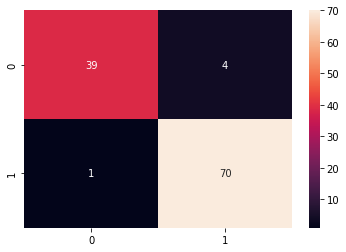

In [114]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

##**Finding Optimal Value of K**

In [115]:
error_rate = []

In [116]:
y_test1d = y_test['label'].tolist()

In [117]:
len(y_test1d)

114

In [118]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_err = knn.predict(X_test)
  error_rate.append(np.mean(y_err != y_test1d))

In [119]:
error_rate

[0.07017543859649122,
 0.07017543859649122,
 0.07017543859649122,
 0.06140350877192982,
 0.043859649122807015,
 0.03508771929824561,
 0.043859649122807015,
 0.043859649122807015,
 0.043859649122807015,
 0.02631578947368421,
 0.017543859649122806,
 0.017543859649122806,
 0.02631578947368421,
 0.02631578947368421,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.043859649122807015,
 0.03508771929824561,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842]

Minimum error:- 0.017543859649122806 at K = 10


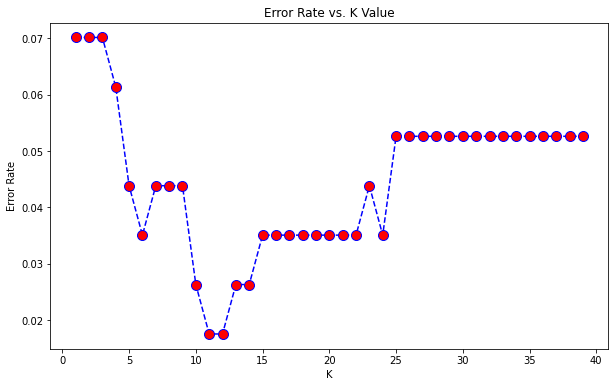

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [121]:
acc_score = []

In [127]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_acc = knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_acc))

Maximum accuracy:- 0.9824561403508771 at K = 10


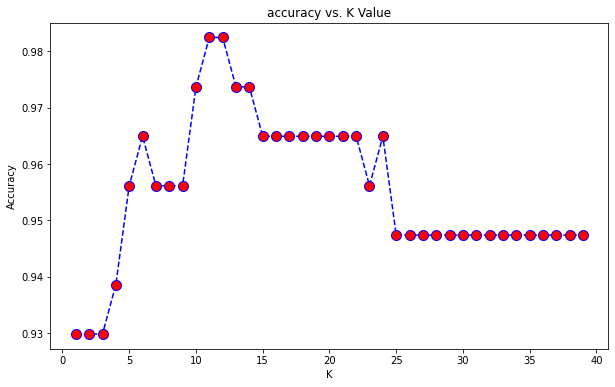

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc_score,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc_score),"at K =",acc_score.index(max(acc_score)))